In [2]:
import matplotlib.pyplot as plt 
import numpy as np


###### Seyrek örneklemenin zaman domeninde incelenmesi

[ 5.00000000e+00  4.33012702e+00  2.50000000e+00  3.06161700e-16
 -2.50000000e+00 -4.33012702e+00 -5.00000000e+00 -4.33012702e+00
 -2.50000000e+00 -9.18485099e-16  2.50000000e+00  4.33012702e+00
  5.00000000e+00  4.33012702e+00  2.50000000e+00  1.53080850e-15
 -2.50000000e+00 -4.33012702e+00 -5.00000000e+00 -4.33012702e+00
 -2.50000000e+00 -2.14313190e-15  2.50000000e+00  4.33012702e+00]


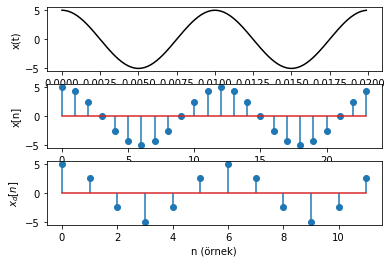

In [12]:
import matplotlib.pyplot as plt 
import numpy as np

f = 100 
T = 1 / f 
t = np.arange( 0. , 2 * T , 0.0001 )

x = 5*np.cos( 200 * np.pi * t)


plt.figure()
plt.subplot(3,1,1)
plt.plot(t,x, 'black')
plt.xlabel("t (sn)")
plt.ylabel("x(t)")


Fs=1200
Ts=1/Fs

N=12
n=np.arange( 0. , 2*N ) 
xn=5*np.cos( 200 * np.pi * n * Ts )

plt.subplot(3,1,2)
plt.stem( n , xn , use_line_collection='True')
plt.xlabel("n (örnek)") 
plt.ylabel("x[n]")

M = 2 # Seyrek örnekleme katsayısı 
print(xn)
xn_d = xn[::M] 
n_d = np.arange(len(xn_d))


plt.subplot(3,1,3)
plt.stem(n_d, xn_d , use_line_collection='True') 
plt.ylabel('$x_d[n]$')
plt.xlabel('n (örnek)') 
plt.show()

Fs=600
Ts=1/Fs
N=6

n=np.arange( 0.,2*N ) 
xn=5*np.cos(200*np.pi*n*Ts) 
plt.figure()
plt.stem(n,xn , use_line_collection='True')
plt.xlabel("n (örnek)") 
plt.ylabel("$x_2[n]$")
plt.show()






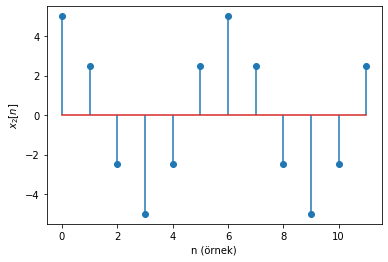

In [14]:
Fs=600
Ts=1/Fs
N=6

n=np.arange( 0.,2*N ) 
xn=5*np.cos(200*np.pi*n*Ts) 
plt.figure()
plt.stem(n,xn , use_line_collection='True')
plt.xlabel("n (örnek)") 
plt.ylabel("$x_2[n]$")
plt.show()

###### Seyrek örneklemenin frekans domaininde incelenmesi

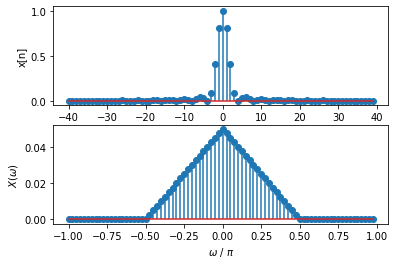

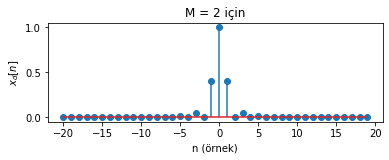

26.666666666666668
27
26


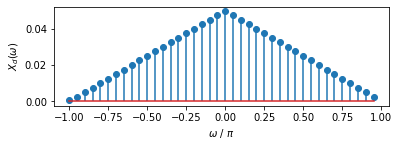

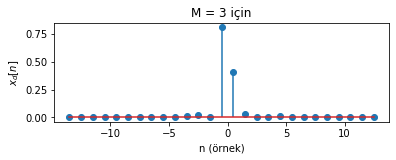

Text(0, 0.5, '$X_d(\\omega)$')

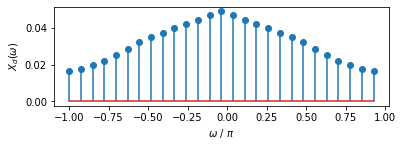

In [16]:
N = 80
nTs = np.arange(-10 , 10, 20/N)

xn = np.sinc(nTs)**2
n  = np.arange(-40, 40) 

w  = np.arange(-np.pi, np.pi, 2*np.pi/N) 
xw = np.fft.fftshift(np.fft.fft(xn,N)/N)


plt.figure()
plt.subplot(2,1,1)
plt.stem(n,xn, use_line_collection='True')

plt.xlabel("n (örnek)") 
plt.ylabel("x[n]")

plt.subplot(2,1,2)
plt.stem(w/np.pi,abs(xw) , use_line_collection='True')
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X(\omega)$")
plt.show()

M = 2

xn_d = xn[::M] 
N_d = round(N/M)
n_d = np.arange(-N_d/2,N_d/2) 

w_d = np.arange(-np.pi, np.pi, 2*np.pi/N_d)
xw_d = np.fft.fftshift(np.fft.fft(xn_d,N_d)/N_d)


plt.figure()

plt.subplot(2,1,1)
plt.title('M = 2 için')
plt.stem(n_d, xn_d , use_line_collection='True') 
plt.ylabel('$x_d[n]$') 
plt.xlabel('n (örnek)') 
plt.show() 

plt.subplot(2,1,2)
plt.stem(w_d/np.pi,abs(xw_d) , use_line_collection='True')
plt.xlabel('$\omega$ / $\pi$')
plt.ylabel('$X_d(\omega)$')

M = 3

xn_d = xn[::M] 
print(N/M)
print(round(N/M))
print(round(N/M-0.2))
N_d = round(N/M)
n_d = np.arange(-N_d/2,N_d/2) 

w_d = np.arange(-np.pi, np.pi, 2*np.pi/N_d)
xw_d = np.fft.fftshift(np.fft.fft(xn_d,N_d)/N_d)


plt.figure()

plt.subplot(2,1,1)
plt.title('M = 3 için')
plt.stem(n_d, xn_d , use_line_collection='True') 
plt.ylabel('$x_d[n]$') 
plt.xlabel('n (örnek)') 
plt.show() 

plt.subplot(2,1,2)
plt.stem(w_d/np.pi,abs(xw_d) , use_line_collection='True')
plt.xlabel('$\omega$ / $\pi$')
plt.ylabel('$X_d(\omega)$')



###### Sık örneklemenin zaman domaininde incelenmesi

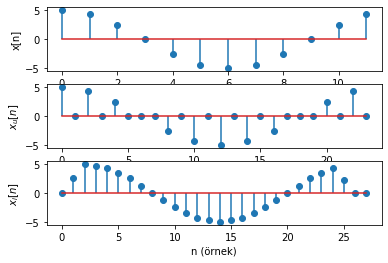

In [23]:
Fs=1200
Ts=1/Fs
N=12

n=np.arange(0,N) 
xn=5*np.cos(200*np.pi*n*Ts)


plt.figure()
plt.subplot(3,1,1)
plt.stem(n,xn , use_line_collection='True')
plt.xlabel("n (örnek)")
plt.ylabel("x[n]")


# Sık örnekleme işlemi ->
L = 2 # Sık örnekleme Katsayısı
Nn_u = N*L
xn_u = np.zeros(Nn_u)

xn_u[::L] = xn
n_u = np.arange(0, Nn_u)

plt.subplot(3,1,2)
plt.stem(n_u, xn_u , use_line_collection='True')
plt.ylabel('$x_u[n]$')
plt.xlabel('n (örnek)')

# interpolasyon işlemi ->
hn = np.array([0,1/2,1,1/2,0]) 
xn_i = np.convolve(xn_u,hn,'full') 
n_i = np.arange(len(xn_i))

plt.subplot(3,1,3)
plt.stem(n_i,xn_i , use_line_collection='True')
plt.xlabel("n (örnek)")
plt.ylabel("$x_i[n]$")
plt.show()





###### Sık örneklemenin frekans domaininde incelenmesi

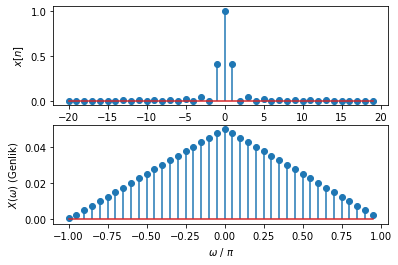

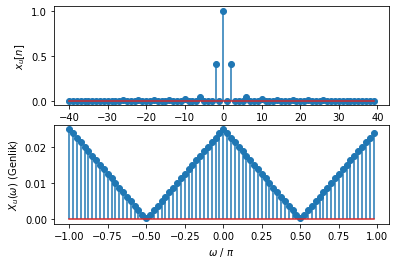

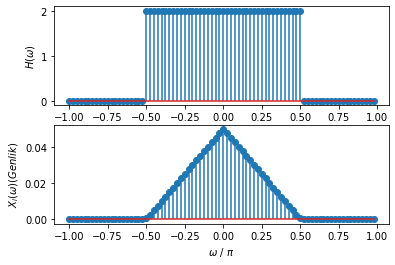

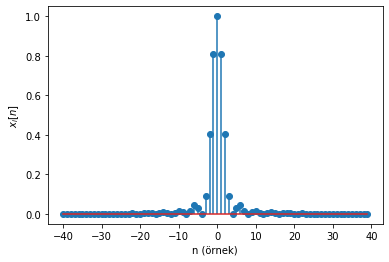

In [30]:
N = 40
nTs = np.arange(-10,10,20/N)

xn = np.sinc(nTs)**2 
n = np.arange(-20, 20) 

w = np.arange(-np.pi, np.pi, 2*np.pi/N) 
xw = np.fft.fftshift(np.fft.fft(xn,N)/N)

plt.figure()
plt.subplot(2,1,1)
plt.stem(n,xn ,use_line_collection='True')
plt.xlabel("n (örnek)")
plt.ylabel("$x[n]$")

plt.subplot(2,1,2)
plt.stem(w/np.pi,abs(xw) , use_line_collection='True')
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X(\omega)$ (Genlik)")


# Sık örnekleme (up sampling) oranı
L = 2

N_u = N*L
n_u = np.arange(-N_u/2, N_u/2) 

xn_u = np.zeros(N_u)
xn_u[::L] = xn


w_u = np.arange(-(np.pi), (np.pi), 2*(np.pi)/N_u)
xw_u = np.fft.fftshift(np.fft.fft(xn_u, N_u)/N_u)

plt.figure()
plt.subplot(2,1,1)
plt.stem(n_u,xn_u ,use_line_collection='True')
plt.xlabel("n (örnek)") 
plt.ylabel("$x_u[n]$")

plt.subplot(2,1,2)
plt.stem(w_u/np.pi,abs(xw_u) , use_line_collection='True')
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X_u(\omega)$ (Genlik)")


hw = np.zeros(N_u)
w_i = np.arange(-(np.pi), (np.pi), 2*(np.pi)/N_u) 
indis = np.where(abs(w_i)<=np.pi/2)

hw[indis] = L

xw_i = xw_u * hw
N_i =len(xw_i)


plt.figure()
plt.subplot(2,1,1)
plt.stem(w_i/np.pi, abs(hw) , use_line_collection='True')
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$H(\omega)$")

plt.subplot(2,1,2)
plt.stem(w_i/np.pi,abs(xw_i), use_line_collection='True')
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X_i(\omega) (Genlik)$")

xn_i = np.fft.ifft(np.fft.ifftshift(xw_i), N_i)*N_i
ni =np.arange(-N_i/2, N_i/2)

plt.figure()
plt.stem(ni, abs(xn_i) , use_line_collection='True')
plt.xlabel("n (örnek)")
plt.ylabel("$x_i[n]$")
plt.show()